# Check for GPU

In [1]:
import os

if 'COLAB_GPU' in os.environ:
  print("GPU is enabled")
else:
  print("GPU is not enabled")

GPU is enabled


In [2]:
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.8 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)


# Import Custom Trained Dataset from Roboflow

In [4]:
%pwd


'/content'

In [5]:
!mkdir VehicleDataset

In [6]:
!ls

VehicleDataset


In [7]:

os.chdir("/content/VehicleDataset")
%pwd

'/content/VehicleDataset'

In [8]:
# 1. Install Roboflow (if not already)
!pip install -q roboflow

# 2. Uninstall the latest pillow-heif that causes the error
!pip uninstall -y pillow-heif

# 3. Install the last known compatible version
!pip install -q pillow-heif==0.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 91.7 MB/s eta 0:00:00
Found existing installation: pillow_heif 1.0.0
Uninstalling pillow_heif-1.0.0:
  Successfully uninstalled pillow_heif-1.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 110.0 MB/s eta 0:00:00


In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1rpZXO56ELQn3KgcdQ68")
project = rf.workspace("kunnusherry").project("indian-vehicle-detection-wuoum")
version = project.version(5)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Indian-Vehicle-Detection-5 in yolov8:: 100%|██████████| 6692/6692 [00:01<00:00, 6328.65it/s]


# Train the Yolov8 model

In [10]:

import os
os.chdir('/content/VehicleDataset/Indian-Vehicle-Detection-5')
%pwd
!yolo task=detect mode=train model=yolov8m.pt data=data.yaml epochs=10 imgsz=640 batch=16

100% 49.7M/49.7M [00:00<00:00, 420MB/s]
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

In [11]:
!ls "/content/VehicleDataset/Indian-Vehicle-Detection-5/runs/detect/train"

args.yaml			 PR_curve.png	   val_batch0_labels.jpg
confusion_matrix_normalized.png  R_curve.png	   val_batch0_pred.jpg
confusion_matrix.png		 results.csv	   val_batch1_labels.jpg
F1_curve.png			 results.png	   val_batch1_pred.jpg
labels_correlogram.jpg		 train_batch0.jpg  val_batch2_labels.jpg
labels.jpg			 train_batch1.jpg  val_batch2_pred.jpg
P_curve.png			 train_batch2.jpg  weights


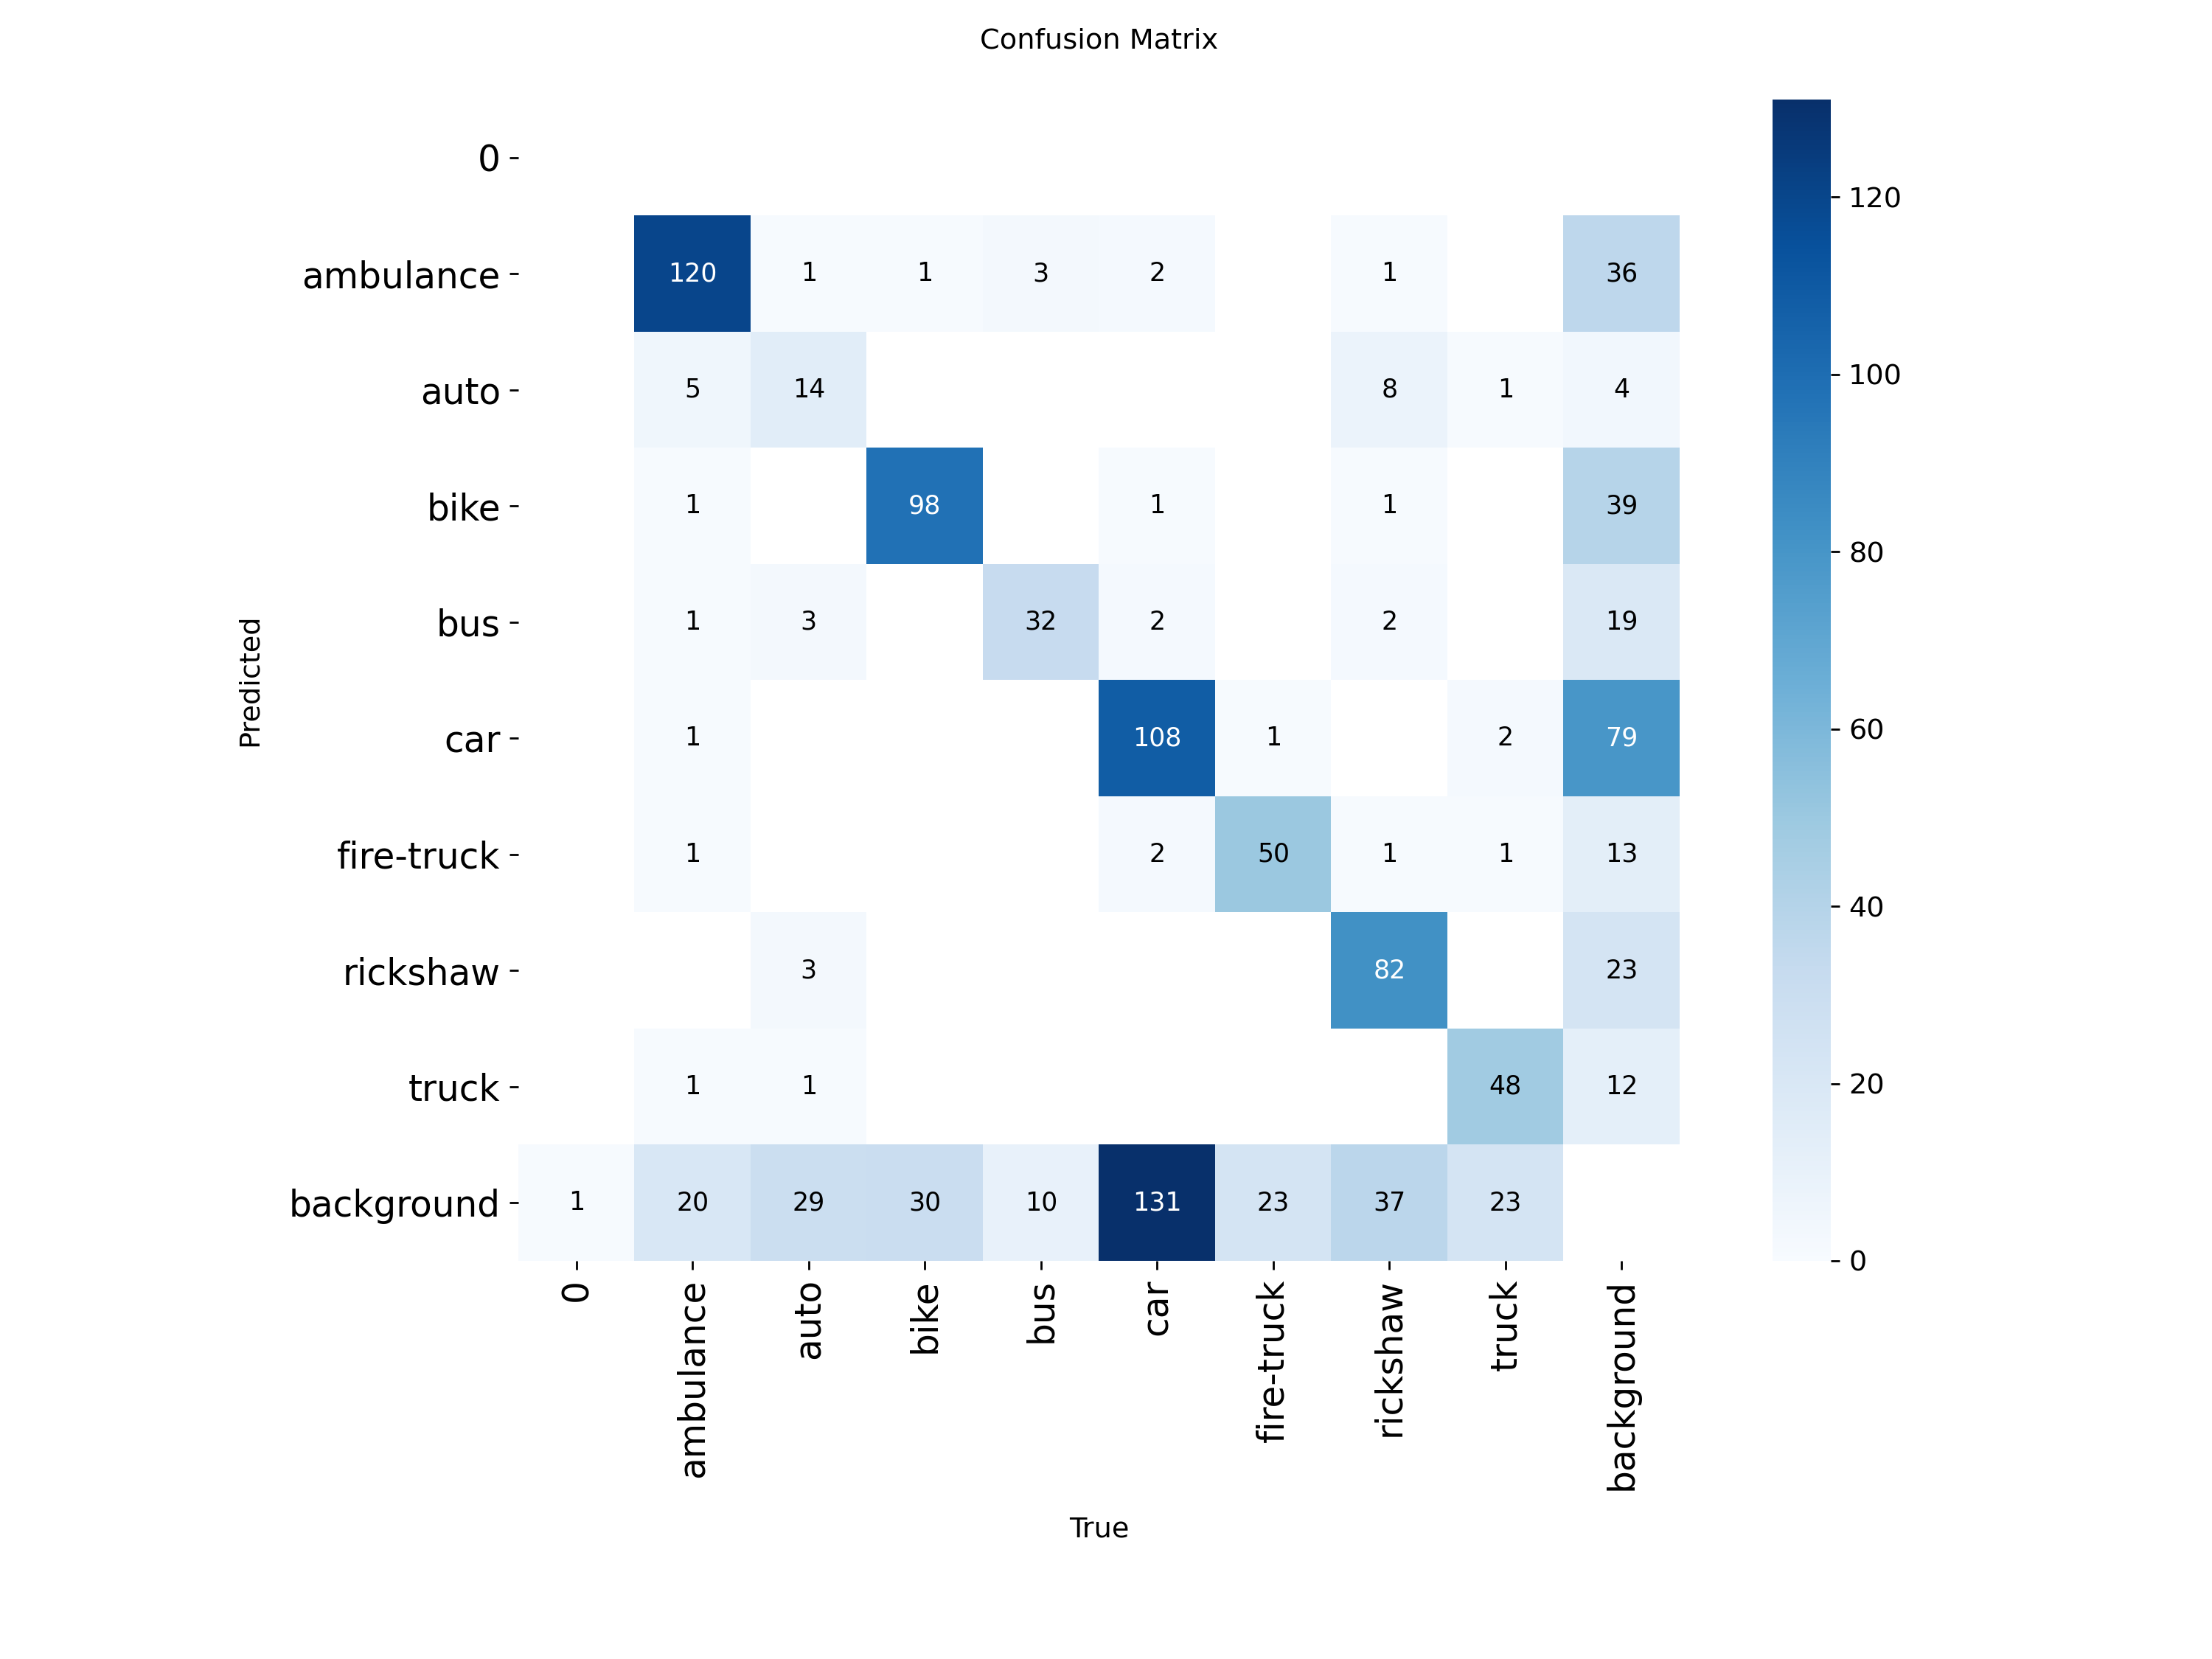

In [13]:
result_data = "/content/VehicleDataset/Indian-Vehicle-Detection-5/runs/detect/train/"
from IPython.display import Image, display
Image(filename=f'{result_data}confusion_matrix.png')

Validating the model


In [14]:


os.chdir('/content/')
!mkdir Test


In [16]:
!yolo task=detect mode=predict model=/content/VehicleDataset/Indian-Vehicle-Detection-5/runs/detect/train/weights/best.pt source=/content/Test/images.jpg save=True

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,844,971 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/Test/images.jpg: 352x640 1 ambulance, 2 cars, 80.9ms
Speed: 3.7ms preprocess, 80.9ms inference, 161.0ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


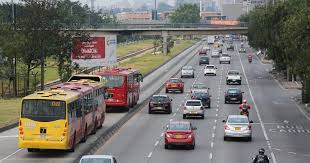

In [17]:
result_data = "/content/Test/images.jpg"
from IPython.display import Image, display
Image(filename=result_data)

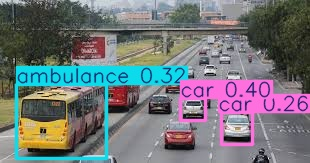

In [18]:
result_data = "/content/runs/detect/predict/images.jpg"
from IPython.display import Image, display
Image(filename=result_data)